   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  

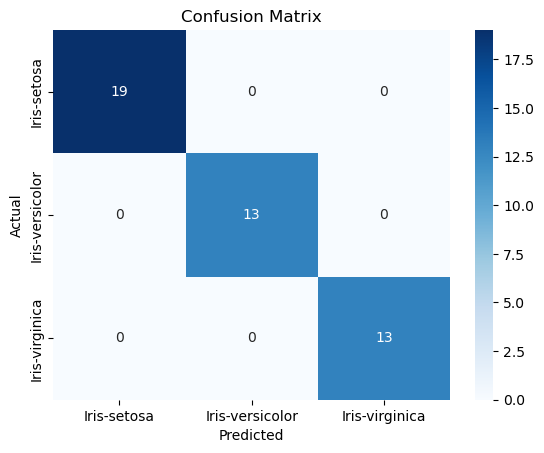


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Predicted Species: Iris-virginica


c:\Users\Regienald Pueblos\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import dataset
df = pd.read_csv('input/Iris.csv')

# 2.1. Load the dataset and explore it's structure
print(df.head(10))
print(df.info())

# 2.2. Preprocess the data by handling missing values (if any) and encoding categorical variables
df = df.drop('Id', axis=1)

encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

species_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_))) 
print(f"Species Mapping: {species_mapping}")

X = df.drop('Species', axis=1)
y = df['Species']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# 2.3. Split the data into training (70%) and test (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build a classification model using the K-Nearest Neighbors (KNN) algorithm to predict the target class
knn =  KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

# 4. Evaluate the model's performance using accuracy, precision and recall
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# 5. Display the confusion matrix to visualize classification results.
cm = confusion_matrix(y_test, y_pred)

species_labels = encoder.classes_
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_labels, yticklabels=species_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

sample = [[6.3, 2.9, 5.6, 1.8]] # Expected Output: Iris-virginica
sample_scaled = scaler.transform(sample)
prediction = knn.predict(sample_scaled)
predicted_species = encoder.inverse_transform(prediction)
print(f"Predicted Species: {predicted_species[0]}")


